## Introduction

While writing this notebook I am reading the first chapter of the book and will summarize some programming assignments, the algorithms, extra challenge problems that I attempt and the math behind the analysis of the algorithms explained.

---
 We will start by looking at the Integer Multiplication problem. 
 
To multiply two numbers we need to have the following primitive operations

- Add two single digit numbers
- Multiply two single-digit numbers
- Append of prepend a 0 to a number

Following image shows how perform the following multiplication $5678 \times 1234$
 
 ![Multiply](ConventionalMultiplication.png)
 
 Let us now analyze the total number of operations for multiplying two n digit numbers
 
 A partial product involves multiplying 1 digit of an n digit number with another n digit. Each multiplication involves atmost $2n$ operations where we have n multiplications for an n digit number and then an addition if a carry is generated from the previous multiplication operation.  Essentially we have $n \times 2n$ operations giving is $2n^2$ multiply operations for multiplying two n digit numbers.
 
 We still are left with adding up these partial products. We have n rows of these partial sums and each of these n rows can have a carry giving us a maximum of 2n operations per row and thus adding up all partial sums gives is $n \times 2n = 2n^2$ operations
 
 Thus the conventional multiplication takes $2n^2 + 2n^2 = 4n^2$ operations. Or, more generally the number of operations for performing multiplication of two n digit numbers is $Cn^ 2$ operations. Thus the work increases quadratically with the number of digits in the the number.
 
 ---
 
 ***Can we do better than $n^2$ complexity?***
 
 Let us look at an alternate way to multiply two numbers known as *Karatsuba Multiplication*. We will us ethe same two numbers 5678 and 1234 and see Karatsuba Multiplication in action.
 
 - Break up these two 4 digit numbers into halfs, thus we get 4 smaller numbers of 2 digits each. We call them a, b, c and d. Thus for the above example, 5678 will be split in two numbers 56 and 78 and we call them a and b respectively. Similarly, 1234 will be split into c and d with values 12 and 34 respectively.
 - Compute $a \times c$ which is $56 \times 12 = 672$
 - Compute $b \times d$ which is $78 \times 34 = 2652$
 - Compute $(a + b) \times (c + d)$ which is $(56 + 78) \times (12 + 34) = 6164$
 - Subtract the first two results from the third, thus we get $6164 - 672 - 2652 = 2840$
 - Compute $10^4 \times 672 + 10^2 \times  2840 + 2652 = 7006652$
 
 The above result is exactly same as the one we got using the conventional method.
 
 ---
 
 Before we implement the Karatsuba multiplication, let us implement a recursive approach to multiply two numbers.
 Let the two number be n digit numbers x and y, to keep the initial implementation simple, we assume both the numbers are n digits but can easily be extended to two numbers of different number of digits.
 
 
Let x and y be split into two $n/2$ digit numbers a, b and c,d respectively.

Thus 
$x = 10^{n/2}.a + b$ and $y = 10^ {n/2}.c + d$

$x.y = (10^ {n/2}.a + b) \times (10^ {n/2}.c + d) = 10^n.ab + 10^{n/2}.(a.d + b.c) + b.d $
 
 
Following code snippet ``rec_int_mult`` implements this recursive multiplication of two numbers. But first we will be defining a simple function which will take a number and pad it with leading 0 so that the length of the number is a power of 2 for simplicity in recursion

In [1]:
def pad_len_for_pow_2(num, min_len = None):
    inc_len = 1
    current_len = len(num)
    target_len = current_len if min_len is None else max(min_len, current_len)
    
    while inc_len < target_len:
        # << 1 means each bit moves to the left by a bit 
        inc_len  = inc_len << 1
    
    if inc_len - current_len > 0:
        return '0' * (inc_len - current_len) + num
    else:
        return num
    
def prepare_inputs(in1, in2):
    max_len = max(len(in1), len(in2))
    return pad_len_for_pow_2(in1, max_len), pad_len_for_pow_2(in2, max_len)

In [2]:
pad_len_for_pow_2('12343')

'00012343'

In [3]:
def rec_int_mult(x, y):
    if len(x) == 1 and len(y) == 1:
        return int(x) * int(y)
    
    split = len(x) // 2
    a, b = x[0:split], x[split:]
    c, d = y[0:split], y[split:]
    # We cheat a bit here by multiplying by powers of 10 which can be implemented purely as addition
    return (10 ** len(x)) * rec_int_mult(a, c) + \
            (10 ** split) * (rec_int_mult(a, d) +\
                             rec_int_mult(b, c)) + rec_int_mult(b, d)

In [4]:
in1, in2 = prepare_inputs('56781', '12342')
rec_int_mult(in1, in2)

700791102


The above code snippet involves performing 4 multiplications of smaller digit numbers. Gauss instead worked out a way to replace these 4 multiplications with 3 multiplications and some additions.

Essentially $(a.d + b.c)$ be replaced with $(a + b).(c + d) - a.c - b.d$ thus reducing the multiplications to the following three multiplications

- $a.c$
- $b.d$
- $(a + b).(c + d)$

Essentially we reduce 4 recursive calls with 3 as seen in the following code snippet which is generic enough to accept numbers with not necessarily same number of digits

In [5]:
def karatsuba(x, y):
    if len(x) == 1 and len(y) == 1:
        return int(x) * int(y)
    split = len(x) // 2
    a, b = x[0:split], x[split:]
    c, d = y[0:split], y[split:]
    ac = karatsuba(a, c)
    bd = karatsuba(b, d)
    aplusb = str(int(a) + int(b))
    cplusd = str(int(c) + int(d))
    aplusb_times_cplusd  = karatsuba(*prepare_inputs(aplusb, cplusd))
    return (10 ** len(x)) *  ac + (10 ** split) * (aplusb_times_cplusd - ac - bd) + bd
    
    

In [6]:
in1, in2 = prepare_inputs('5678', '1234')
karatsuba(in1, in2)

7006652


The above result is same as the result we get from the conventional approach. 
Following two cells demonstrate execute the test case and the challenge problem given at [this](http://theory.stanford.edu/~tim/algorithmsilluminated.html) URL.

In [7]:
in1, in2 = prepare_inputs('99999', '9999')
karatsuba(in1, in2)

999890001

In [8]:
in1, in2 = prepare_inputs('3141592653589793238462643383279502884197169399375105820974944592',
                            '2718281828459045235360287471352662497757247093699959574966967627')
karatsuba(in1, in2)

8539734222673567065463550869546574495034888535765114961879601127067743044893204848617875072216249073013374895871952806582723184


By exactly how much Karatsuba multiplication is better than the conventional approach and is the divide and conquer approach in ``rec_int_mult`` any better than the conventional approach? We will look at answering this later after we finish the $4^{th}$ chapter where we explore the Master Method.

---

## Merge Sort

We will now analyse one of the most widely used and an efficient sorting algorithm, *Merge Sort*

---

Following implementation is an example of Insertion sort which requires 2 passes of the array giving it $O(n^2)$ complexity

In [9]:
def insertion(inp):
    res = input
    for i in range(len(res)):
        for j in range(i + 1, len(res)):
            if res[j] < res[i]:
                t = res[i]
                res[i] = res[j]
                res[j] = t                
            
    return res

In [10]:
insertion([9, 9, 1, 2, 4, 6, 3, 8, 5])

TypeError: object of type 'method' has no len()


Quadratic time is not desirable for large arrays and we would ideally want to have an algorithm which have complexity between $O(n)$ and $O(n^2)$.

With this goal in mind, let us see what merge sort does and then later derive it's time complexity.

The following picture shows how merge sort works

![MergeSort](MergeSortIllustration.png)

Following three operations is what we have in Merge Sort

- Split the input array in two, this is usually done by finding the middle index of the input array
- Recursively call sort on these two splits, this operation should return us two sorted arrays
- Merge the two sorted arrays in one array which would be sorted.


In the following code snippet we will implement merge sort. To keep the code simple and readable, we will not be making it efficient in terms of space. That is, we can allocate the entire array upfront and have the subproblems update a part of this preinitialized array.

In [11]:
def merge(sorted1, sorted2):
    # Merges the two sorted arrays into one sorted array in linear time
    res = []
    i = 0
    j = 0    
    for k in range(len(sorted1) + len(sorted2)):        
        if i == len(sorted1):
            res = res + [sorted2[ind] for ind in range(j, len(sorted2))]
            break
        if j == len(sorted2):
            res = res + [sorted1[ind] for ind in range(i, len(sorted1))]
            break
        
        if sorted1[i] < sorted2[j]:
            res.append(sorted1[i])
            i += 1
        else:
            res.append(sorted2[j])
            j += 1
    
    return res

def mergesort(inarray):
    if len(inarray) <= 1:
        return inarray
    
    mid = len(inarray) // 2
    l = mergesort(inarray[:mid])
    r = mergesort(inarray[mid:])
    return merge(l, r)

In [12]:
mergesort([9, 7, 1, 2, 4, 6, 3, 8, 5])

[1, 2, 3, 4, 5, 6, 7, 8, 9]


Again, as mentioned previously the above implementation is not efficient in terms of space as each recursive call generates a new list which is then discarted. Nevertheless it is succinct and is a good translation of the pseudocode to a working code.

We are more interested in the running time complexity of the Merge sort which we will analyze now. Following is the psuedo code for the merge operation we implemented above

![MergePseudocode](MergePseudocode.png)

We see there are 2 operations for initilizing the variables i and j, and then the loop that runs n times.
In the loop we peform the following

- Comparison C[i] < D[j] 
- Assignment B[k] := C[i]  or B[k] := D[j]
- Increment of variable i or j
- Increment of loop variable k

This we have a total of $4n + 2$ operations. We will make this a total of $6n$ since $6n > 4n + 2$

The number $6n$ is just an estimate and doesn't really consider a programming language's implementation. For example, the Python implementation of merge we have is strkingly similar to the the merge pseudo code and also implements some edge cases when all elements of one of the array are copied over. For the sake of analysis $6n$ is a reasonable estimate.

We thus have the following Lemma

*For a pair of sorted input array of size $l/2$, merge function will merge them in one sorted list in no more than $6l$ operations*

Now that we have an upper bound on the running time of Merge, let us see how many operations are required for entire merge sort call.

Following is the theorem we are looking to prove

*Merge sort algoritm runs in at most $6nlog_2{n} + 6n$ operations for an input of size n*

Following plots a linear and a log function for comparison (we imagine how huge the gains are by reducing the complexiti from polinomial to logarithmic). 

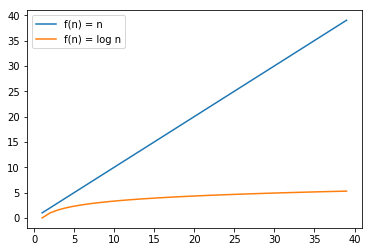

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
x = [x for x in range(1, 40)]
logx = [np.log2(n) for n in x] 
plt.plot(x, x, label = 'f(n) = n')
plt.plot(x, logx, label = 'f(n) = log n')
plt.legend()
plt.show()

---

We will prove the claim of the above theorem that merge sort runs in  $6nlog_2n + 6n$ time 

- Given an input of size n, we split it in two portions and call them the left and the right portion of the input array. We recursively do the same till we reach the leaves where we have 1 element each and no further splitting of the input can be done. With this splitting we end up getting $log_2n$ levels of the tree.
- At each level we double the number of subproblems we have on the previous level. At root level we have 1 problem, at level 1 we have 2 problems, at level 2 we have 4 subproblems and so on. Generalizing this we see that at level j we have $2^n$ subproblems.
- Similarly at each level, we split the input in two parts and call the the sort function recursively on these two halfs. For example, suppose at level 0(root) we have 8 inputs values. Then at level 1 we have all inputs presented with an input of size 4, at level 2 each subproblem is presented with an input of size 2 and finally at level 3 each subproblem is presented with an input of size 1. Thus generalizing this, we see that at each level the size of the input presented to a subproblem at level j is $n / 2^j$

We have seen earlier that for an input of size l, the work done by l is no more than than $6l$. Thus for an input of size $n/2^j$, the work done in merging it is $6n/2^j$.

If we simply focus on a level j of this recursive call tree (ignoring the recursive calls at level j). Then the total work done **at** level j is 

*#number of subproblems at level j* $\times$ *work done on input to level j subproblem* which is 

$2^n \times 6n/2^n = 6n$

This shows that irrespective of the level, the work done at level n is $6n$. This is due to the fact that the number of subproblems grow at the same rate at which the input to these sub problems shrink cancelling out each other.

For an input of size n we have $log_2n + 1$ levels. Thus the total work done by the merge sort to sort an input of size n is $6n \times (log_2n + 1) = 6nlog_2n + 6n$ proving our claim in the theorem.

---

### Guiding principles in the analysis of the algorithms

#### Principle #1,  Worst-Case Analysis

For the above problem of merge sort, the worst case time complexity is $6nlog_2n + 6n$. Which essentially says that no matter what, for any possible input (in the domain of the valid acceptable inputs by the function), the complexity stated is what we can expect. Other approaches like *average-case analysis* assumes some most common inputs from the distribution of the possible inputs we expect to see and then give a complexity. Some other approach would be to benchmark the running time of the algorithm on a dataset which is the representative of the real world problems. In case of average-case analysis and running time analysis, we require domain knowledge where as in case of worst case we don't make any assumptions on the possible inputs.

#### Principle #2, Big-Picture Analysis
We will be ignoring the constants and the lower order terms of the number of operations taken to execute the algorithm for an input of size n. There are few reasons for that

- It makes it easier for mathematical analysis
- Constants heavily depend on the environment. For example, the complexity of 6n for the merge operation seems reasonable in Pusedo code, but not really convincing when we look at the Python implementation of ``merge``
- We lose little predictive power. The constants and lower order complexity might be necessary for problems where its absolutely necessary for perform the analysis of the performance to the very fine details of the code, but for the big picture it is not necessary.

#### Principle #3, Asymptotic Analysis
This principle focuses on the growth rate of the algorithm with increase in size of the input. For example, the complexity of merge sort is $6nlog_2n + 6n$ and suppose another sorting algorithm has a complexity of $n^2 / 2$, the algorithm with quadaratic complexity will be faster than merge sort for smaller inputs. However when we analyse the complexity, it will be be large inputs as that is where the performance of the algorithms count. For an input of size 1000 or so, any sorting algorithm will give results quickly on modern computers. Following plot shows is the comparison of the above mentioned equations.



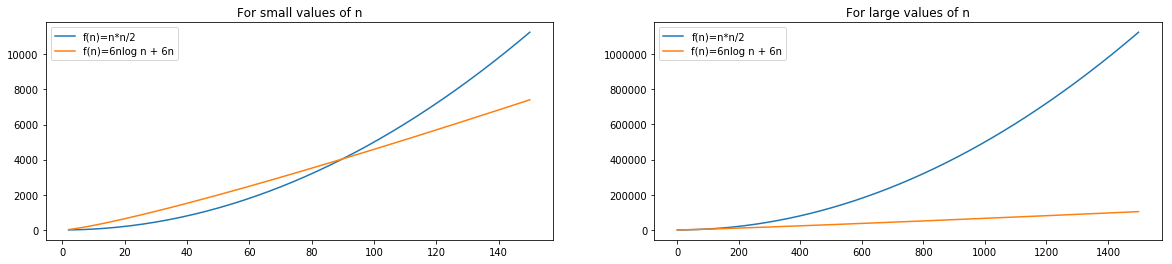

In [14]:
f, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 4))
x = [a for a in range(1, 1500)]
xquad = [a * a / 2 for a in x]
xlog = [6 * l * np.log2(l) + (6 * l) for l in x]
ax1.plot(x[1:150], xquad[1:150], label = 'f(n)=n*n/2')
ax1.plot(x[1:150], xlog[1:150], label = 'f(n)=6nlog n + 6n')
ax1.legend()
ax1.set_title('For small values of n')
ax2.plot(x, xquad, label = 'f(n)=n*n/2')
ax2.plot(x, xlog, label = 'f(n)=6nlog n + 6n')
ax2.legend()
ax2.set_title('For large values of n')
plt.show()

---

### Test Your Understanding

Following is correct to the best of my understanding to the problems and not necessarily correct.

**Problem 1.1:** Suppose we run MergeSort on the following input, 5 3 8 9 1 7 0 2 6 4, after the two outermost recursive calls before the merge step, the two arrays glued together would be 1 3 5 8 9 0 2 4 6 7, thus the seventh element would be 2

**Problem 1.2:** A Modification to merge sort for splitting the input in three (3 way merge sort) will give us the complexity $nlog_3n$ complexity of more generally $nlogn$ complexity. We saw the merge is independent of the level as long as the sub problems grows at the same rate as the input shrinks. The number of levels in case of 3 way merge sort is $log_3n + 1$ levels.

**Problem 1.3:** We have k arrays of size n. Lets say k is 4, then for the first call of merge we have merge calls on array of size n, on second call we have array of size 2n and n and on third and final call we have array of size 3n and n. The complexity is $n + 2n + 3n =n(1 + 2 + 3) = nk(k - 1) / 2 \approx nk^2$

**Problem 1.4:** The total input size we have is nk. Going by the proof of Merge sort. If we split the arrays in 2 k/2 arrays of size n and recursively call merge on two sub groups, the effort to merge these segments of size n at each level is nk. We have a total of $\approx log_2k$ levels thus the complexity is $nklog_2k$

**Problem 1.5:** Find $2^{nd}$ largest element with no more than $n + log_2n - 2$ comparisons. See the code below for an implementation.

**Problem 1.6:** Already implemented in the notebook earlier.


In [15]:
#Assumptions are that the length of the array is > 0 and a power of 2. The code can easily be modified to 
#support arrays of arbitrary length
def pad_to_power2(array):
    if len(array) == 1:
        return 'There just one element'
        
    inc_len = 1
    current_len = len(array)
    while inc_len < current_len:
        inc_len = inc_len << 1
        
    for i in range(0, inc_len-current_len):
        array.append(-float('inf'))
        i += 1
    return array
    

def find2ndlargest(array):
    #Returns the index of largest and second largest as a tuple 
    array = pad_to_power2(array)
    if len(array) == 2:
        return (1, 0) if array[1] > array[0] else (0, 1) 
        
    #form an array of half size of input by comparing consecutive
    #large numbers and recursing on the remaining
    #Use left and right bit shift to multiply and divide by 2 respectively
    #Using thus trick, we only compare half the number of comparisons as the length of the input array
    #in each recursive call
    
    new_arr = [0] * (len(array) >> 1)
    for i in range(0, len(new_arr)):
        ix1, ix2 = i << 1, (i << 1) +1        
        new_arr[i] = array[ix1] if array[ix1] > array[ix2] else array[ix2]
    
    largest, runner_up = find2ndlargest(new_arr)
    idx = largest << 1
    largest = idx if array[idx] > array[idx + 1] else idx + 1
    idx = runner_up << 1
    runner_up = idx if array[idx] > array[idx + 1] else idx + 1
    
    #At this point, runner up contains number greater than all except the largest and 
    #possibly the neighbor of largest, this is one check we will make before returning the 
    #top two
    
    neighbor_idx = largest - 1 if largest & 1 else largest + 1 
     
    return largest, runner_up if array[runner_up] > array[neighbor_idx] else neighbor_idx


In [16]:
in_array = [7, 1, 2, 4, 6]
print('length pad to power of 2 is', pad_to_power2(in_array))
_, runnerup_idx = find2ndlargest(in_array)   
print('Second largest number is ' + str(in_array[runnerup_idx]))

length pad to power of 2 is [7, 1, 2, 4, 6, -inf, -inf, -inf]
Second largest number is 6


In [17]:
in_array = [7, 1, 2, 4, 6, 3, 8, 5]
_, runnerup_idx = find2ndlargest(in_array)   
print('Second largest number is ' + str(in_array[runnerup_idx]))

in_array = [7, 5, 1, 2, 3, 4, 6, 8]
_, runnerup_idx = find2ndlargest(in_array)   
print('Second largest number is ' + str(in_array[runnerup_idx]))

in_array = [1, 2, 3, 4, 5, 6, 7, 8]
_, runnerup_idx = find2ndlargest(in_array)   
print('Second largest number is ' + str(in_array[runnerup_idx]))   

in_array = [6, 1, 2, 4, 3, 7, 8, 5]
_, runnerup_idx = find2ndlargest(in_array)   
print('Second largest number is ' + str(in_array[runnerup_idx]))

Second largest number is 7
Second largest number is 7
Second largest number is 7
Second largest number is 7


Thanks to Nathan Nard for pointing out the issue in my code, I have changing my implementation for ``find2ndlargest`` which now works (Hopefully)


TODO: Give correctness proof for the merge and merge sort